ViT-B/16 + MobileNetV2

2026-02-08 05:33:13.834441: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1770528793.980858      24 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1770528794.023177      24 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1770528794.393366      24 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1770528794.393398      24 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1770528794.393401      24 computation_placer.cc:177] computation placer alr

GPU CONFIGURATION CHECK
✅ GPU Available: 2 device(s)
   - PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
   - PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')
✅ Memory growth enabled

TensorFlow version: 2.19.0
Keras version: 3.10.0

🎲 Global seed set to: 42

ViT-B/16 + MobileNetV2 HYBRID ENSEMBLE

Configuration:
  Batch Size: 64
  Epochs: 30
  Image Size: (250, 250)
  Number of Classes: 4
  Learning Rate: 0.0001
  Base Directory: /kaggle/input/elsevier-disease-shrimp-data/2_Conventional_augmented_2500_ttvs

DATA PREPARATION
Found 7000 images belonging to 4 classes.
Found 1500 images belonging to 4 classes.
Found 1500 images belonging to 4 classes.

✓ Data generators created
  Training samples: 7000
  Validation samples: 1500
  Test samples: 1500
  Classes: ['BG', 'Healthy', 'WSSV', 'WSSV_BG']

BUILDING MODEL: ViT-B/16 + MobileNetV2


I0000 00:00:1770528814.714260      24 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13757 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1770528814.720009      24 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13757 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5
/tmp/ipykernel_24/4026255005.py:295: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet = MobileNetV2(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

✓ Model compiled
  Total parameters: 74,913,348

📋 Model Summary:


Model: "ViT_MobileNetV2_Ensemble"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 250, 250,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ViT_B16             │ (None, 768)       │ 71,470,848 │ input_layer[0][0] │
│ (Functional)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ mobilenetv2_1.00_2… │ (None, 1280)      │  2,257,984 │ input_layer[0][0] │
│ (Functional)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ feature_fusion      │ (None, 2048)      │          0 │ ViT_B16[0][0],    │
│ (Concatenate)       │                   │            │ mobilenetv2_1.00… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fusion_dense1       │ (None, 512)       │  1,049,088 │ feature_fusion[0… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fusion_bn1          │ (None, 512)       │      2,048 │ fusion_dense1[0]… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fusion_dropout1     │ (None, 512)       │          0 │ fusion_bn1[0][0]  │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fusion_dense2       │ (None, 256)       │    131,328 │ fusion_dropout1[… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fusion_bn2          │ (None, 256)       │      1,024 │ fusion_dense2[0]… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fusion_dropout2     │ (None, 256)       │          0 │ fusion_bn2[0][0]  │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 4)         │      1,028 │ fusion_dropout2[… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 74,913,348 (285.77 MB)

 Trainable params: 72,653,828 (277.15 MB)

 Non-trainable params: 2,259,520 (8.62 MB)


🎨 Generating model architecture diagram...
✅ Architecture saved as 'vit_mobilenetv2_ensemble_architecture.png'


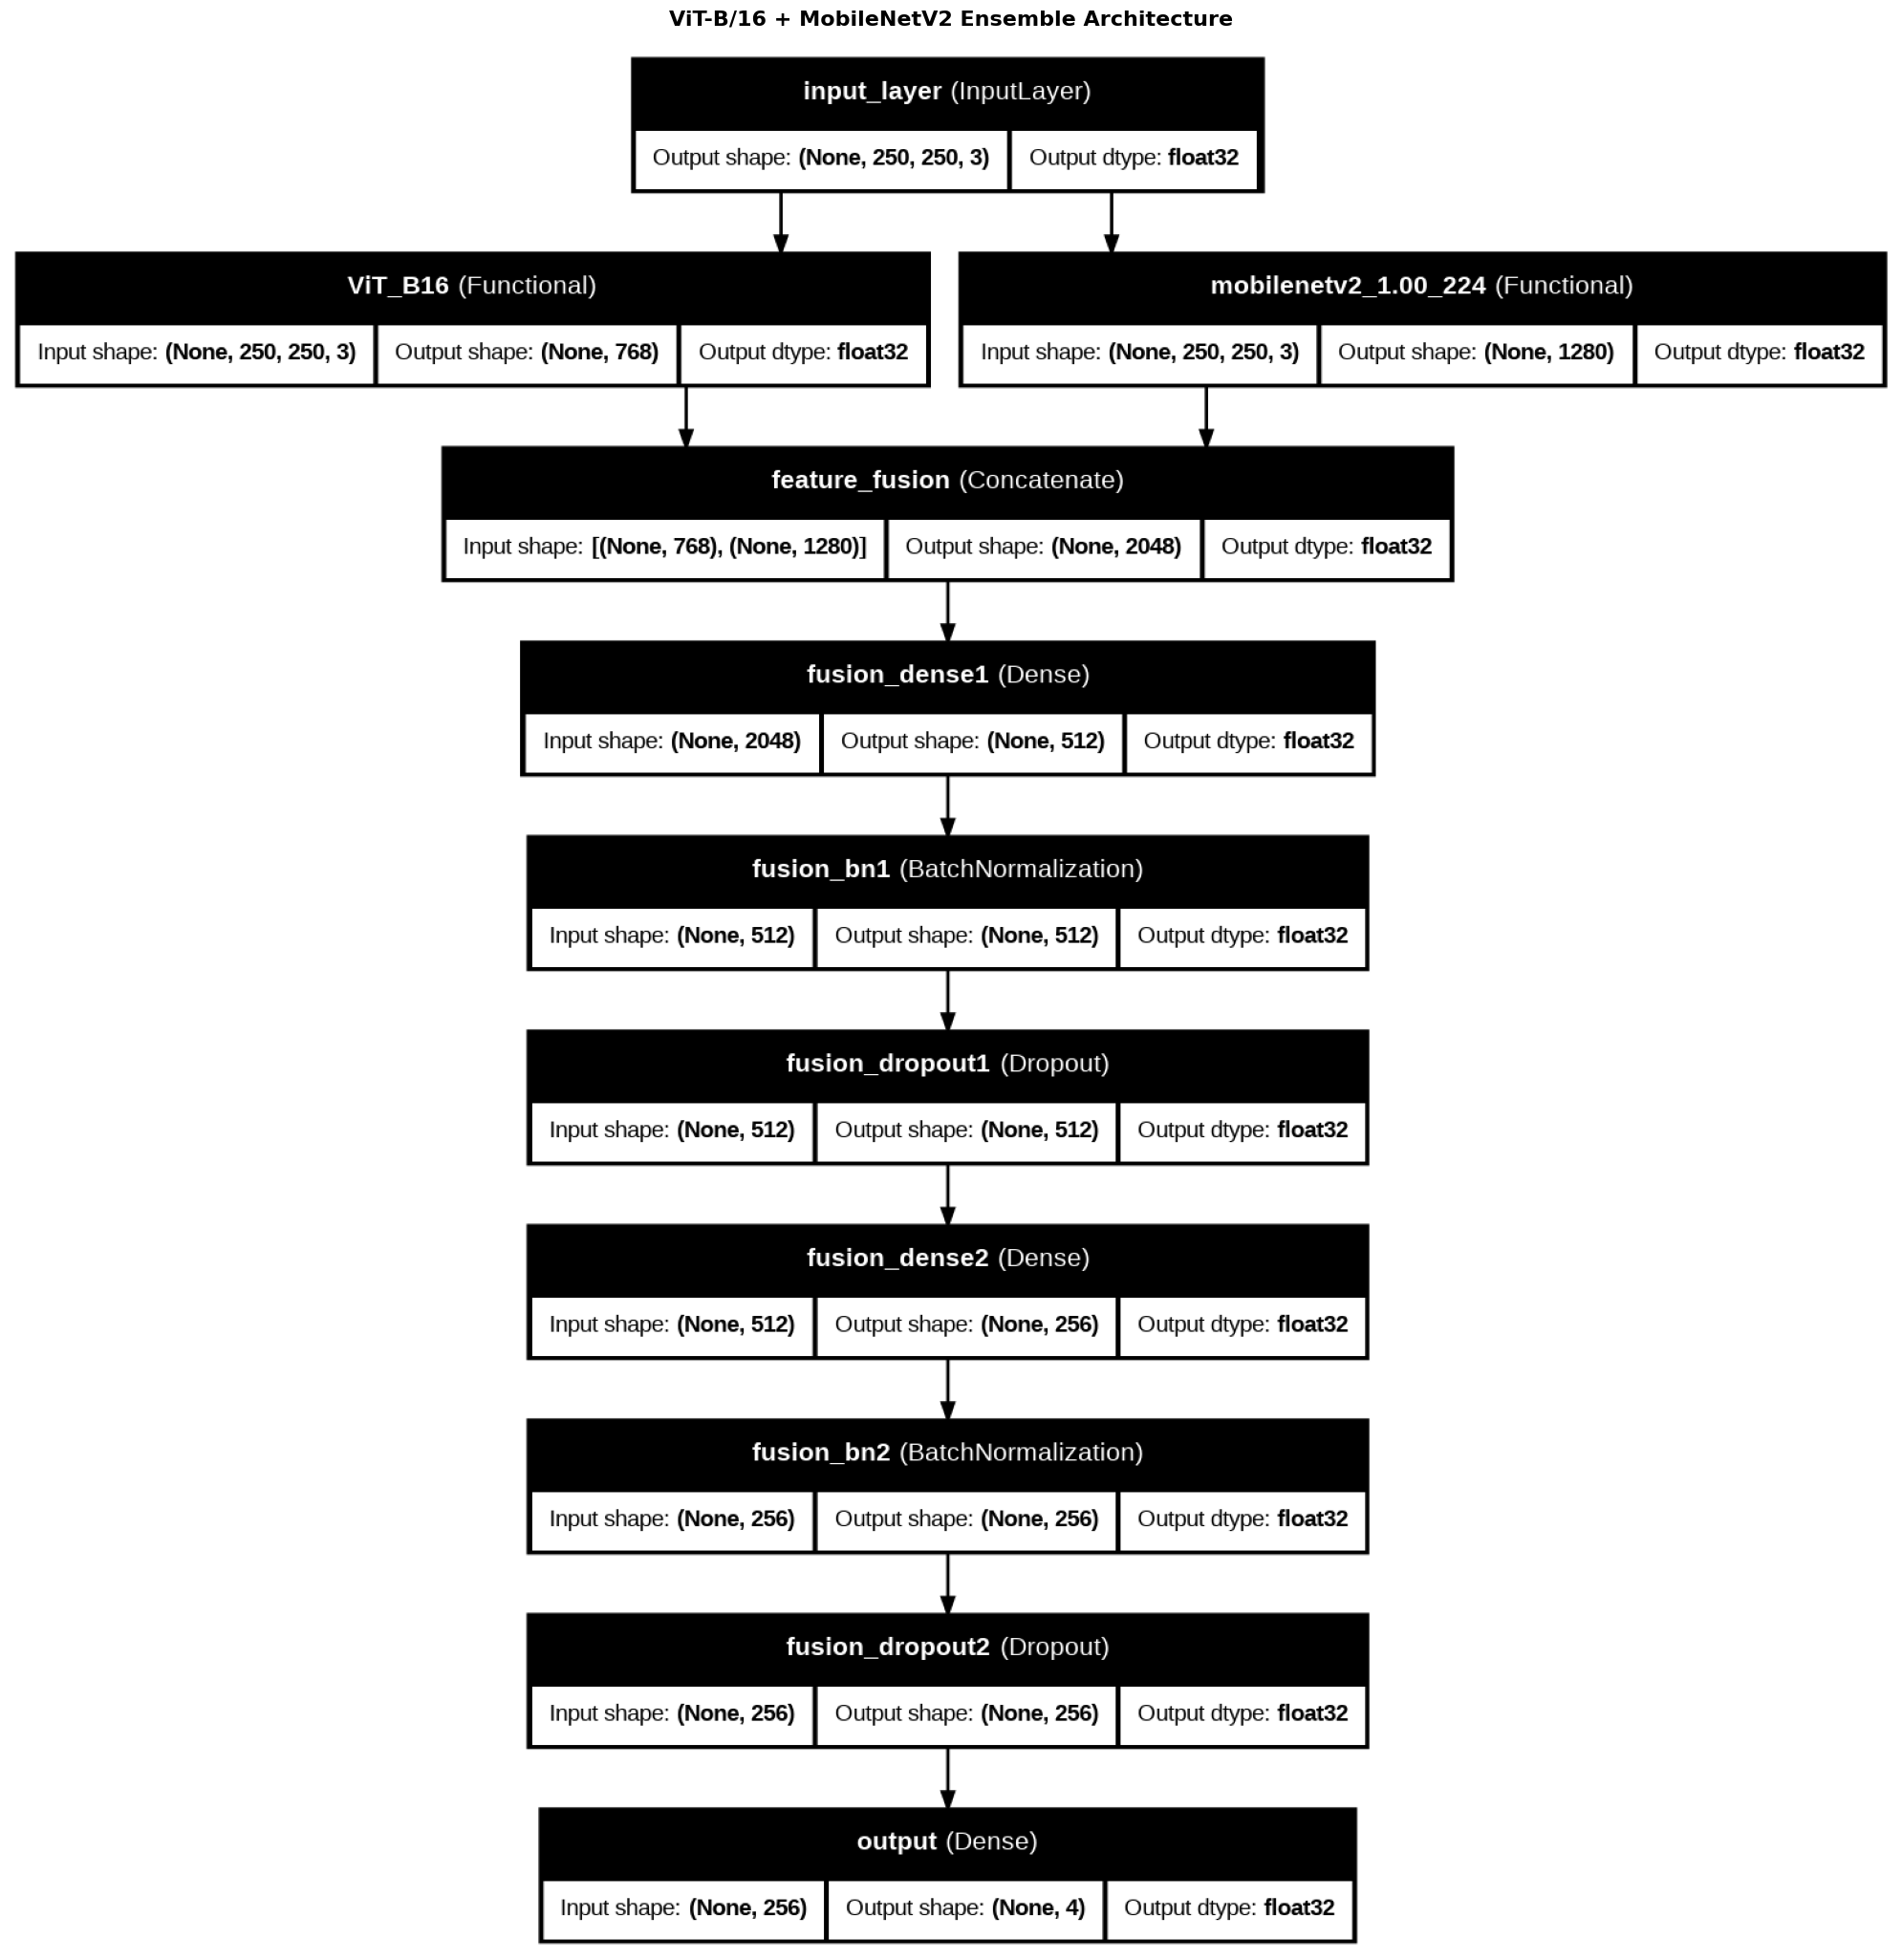

✅ Architecture diagram displayed

🚀 STARTING TRAINING


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30


I0000 00:00:1770528850.950297      90 service.cc:152] XLA service 0x78f7b4001f90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1770528850.950340      90 service.cc:160]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1770528850.950345      90 service.cc:160]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1770528856.395698      90 cuda_dnn.cc:529] Loaded cuDNN version 91002
2026-02-08 05:34:31.831179: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-08 05:34:31.972474: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
I0000 00:00:1770528896.819899      90 device_co

 93/110 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.3600 - loss: 1.7787

2026-02-08 05:38:55.095929: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-08 05:38:55.232585: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3683 - loss: 1.7506

2026-02-08 05:40:33.279858: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2026-02-08 05:40:33.417980: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


110/110 ━━━━━━━━━━━━━━━━━━━━ 419s 3s/step - accuracy: 0.3687 - loss: 1.7491 - val_accuracy: 0.4740 - val_loss: 1.1400 - learning_rate: 1.0000e-04
Epoch 2/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 283s 3s/step - accuracy: 0.5023 - loss: 1.2670 - val_accuracy: 0.5220 - val_loss: 1.0894 - learning_rate: 1.0000e-04
Epoch 3/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 282s 3s/step - accuracy: 0.5576 - loss: 1.1557 - val_accuracy: 0.5520 - val_loss: 1.1033 - learning_rate: 1.0000e-04
Epoch 4/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 283s 3s/step - accuracy: 0.5764 - loss: 1.0507 - val_accuracy: 0.6667 - val_loss: 0.8462 - learning_rate: 1.0000e-04
Epoch 5/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 283s 3s/step - accuracy: 0.6191 - loss: 0.9654 - val_accuracy: 0.4847 - val_loss: 1.3053 - learning_rate: 1.0000e-04
Epoch 6/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 283s 3s/step - accuracy: 0.6243 - loss: 0.9036 - val_accuracy: 0.6467 - val_loss: 0.8385 - learning_rate: 1.0000e-04
Epoch 7/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 283s 3s/step - accuracy: 0.65

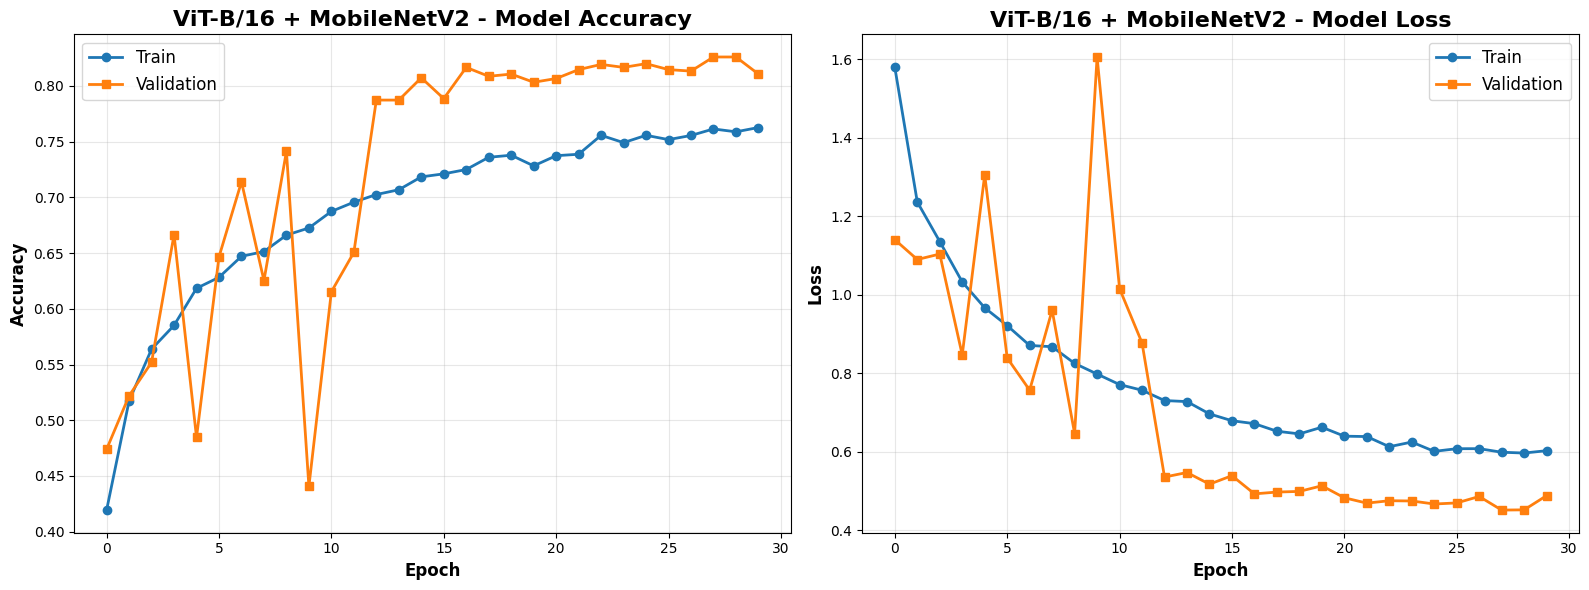


TESTING ON UNSEEN TEST DATA

EVALUATION RESULTS ON TEST DATA - ViT-B/16 + MobileNetV2

🔍 Generating predictions on test set...
24/24 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step

📊 CLASSIFICATION PERFORMANCE METRICS (TEST SET):
                 Class  Precision   Recall  F1-Score  Support
                    BG   0.799020 0.869333  0.832695      375
               Healthy   0.843750 0.792000  0.817056      375
                  WSSV   0.882530 0.781333  0.828854      375
               WSSV_BG   0.838235 0.912000  0.873563      375
Overall (Weighted Avg)   0.840884 0.838667  0.838042     1500

🎯 Test Accuracy: 0.8387 (83.87%)

DETAILED CLASSIFICATION REPORT (TEST SET)

              precision    recall  f1-score   support

          BG     0.7990    0.8693    0.8327       375
     Healthy     0.8438    0.7920    0.8171       375
        WSSV     0.8825    0.7813    0.8289       375
     WSSV_BG     0.8382    0.9120    0.8736       375

    accuracy                         0.8387      1500
   macr

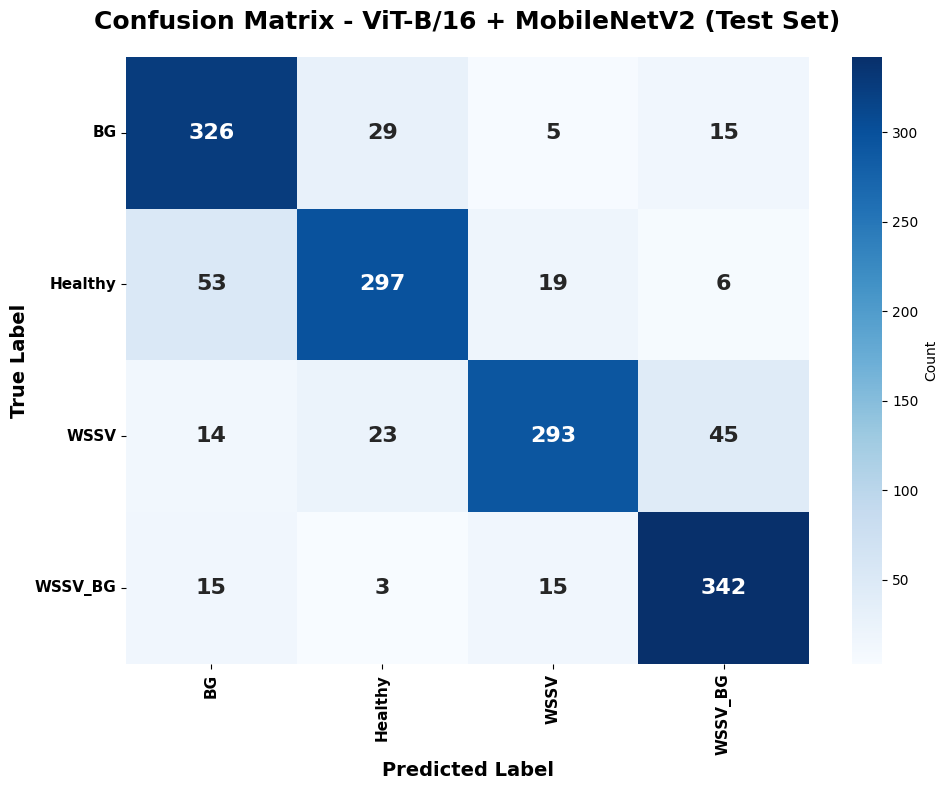


🎉 ViT-B/16 + MobileNetV2 ENSEMBLE COMPLETE!
Model: ViT-B/16 + MobileNetV2
Parameters: 74,913,348
Training Time: 2h 23m 37s
Total Time: 2h 24m 19s
Test Accuracy: 0.8387 (83.87%)
Test Precision: 0.8409 (84.09%)
Test Recall: 0.8387 (83.87%)
Test F1-Score: 0.8380 (83.80%)

✓ Results saved to 'vit_mobilenetv2_results.csv'


In [1]:
"""
ViT-CNN Ensemble Model 1: ViT-B/16 + MobileNetV2
Shrimp Disease Classification
GPU-Optimized Implementation
FIXED VERSION: 30 epochs, improved early stopping, architecture display, memory optimized
"""

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from PIL import Image
import os
import time
import random

# GPU Configuration
print("="*80)
print("GPU CONFIGURATION CHECK")
print("="*80)
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"✅ GPU Available: {len(gpus)} device(s)")
    for gpu in gpus:
        print(f"   - {gpu}")
        tf.config.experimental.set_memory_growth(gpu, True)
    print("✅ Memory growth enabled")
else:
    print("⚠️  No GPU detected! Running on CPU")

print(f"\nTensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")

# Set seeds
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
print(f"\n🎲 Global seed set to: {SEED}")

# ============================================
# CONFIGURATION - CHANGE ONLY THIS SECTION
# ============================================
print("\n" + "=" * 80)
print("ViT-B/16 + MobileNetV2 HYBRID ENSEMBLE")
print("=" * 80)

# Dataset configuration
base_dir = '/kaggle/input/elsevier-disease-shrimp-data/2_Conventional_augmented_2500_ttvs'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

BATCH_SIZE = 64
EPOCHS = 30
IMG_SIZE = (250, 250)
NUM_CLASSES = 4
LEARNING_RATE = 0.0001

print(f"\nConfiguration:")
print(f"  Batch Size: {BATCH_SIZE}")
print(f"  Epochs: {EPOCHS}")
print(f"  Image Size: {IMG_SIZE}")
print(f"  Number of Classes: {NUM_CLASSES}")
print(f"  Learning Rate: {LEARNING_RATE}")
print(f"  Base Directory: {base_dir}")

# ============================================
# DATA PREPARATION
# ============================================
print("\n" + "=" * 80)
print("DATA PREPARATION")
print("=" * 80)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True,
    seed=SEED
)

val_generator = val_test_datagen.flow_from_directory(
    validation_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

class_names = list(train_generator.class_indices.keys())
print(f"\n✓ Data generators created")
print(f"  Training samples: {train_generator.samples}")
print(f"  Validation samples: {val_generator.samples}")
print(f"  Test samples: {test_generator.samples}")
print(f"  Classes: {class_names}")

# ============================================
# HELPER FUNCTIONS
# ============================================
def format_time(seconds):
    """Format seconds into readable time string"""
    hours = int(seconds // 3600)
    minutes = int((seconds % 3600) // 60)
    secs = int(seconds % 60)
    if hours > 0:
        return f"{hours}h {minutes}m {secs}s"
    elif minutes > 0:
        return f"{minutes}m {secs}s"
    else:
        return f"{secs}s"

def plot_training_history(history, model_name):
    """Plot training and validation accuracy and loss"""
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    axes[0].plot(history.history['accuracy'], linewidth=2, label='Train', marker='o')
    axes[0].plot(history.history['val_accuracy'], linewidth=2, label='Validation', marker='s')
    axes[0].set_title(f'{model_name} - Model Accuracy', fontsize=16, fontweight='bold')
    axes[0].set_xlabel('Epoch', fontsize=12, fontweight='bold')
    axes[0].set_ylabel('Accuracy', fontsize=12, fontweight='bold')
    axes[0].legend(fontsize=12)
    axes[0].grid(True, alpha=0.3)
    
    axes[1].plot(history.history['loss'], linewidth=2, label='Train', marker='o')
    axes[1].plot(history.history['val_loss'], linewidth=2, label='Validation', marker='s')
    axes[1].set_title(f'{model_name} - Model Loss', fontsize=16, fontweight='bold')
    axes[1].set_xlabel('Epoch', fontsize=12, fontweight='bold')
    axes[1].set_ylabel('Loss', fontsize=12, fontweight='bold')
    axes[1].legend(fontsize=12)
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def evaluate_model(model, test_generator, model_name):
    """Evaluate model on TEST data"""
    print(f"\n{'=' * 80}")
    print(f"EVALUATION RESULTS ON TEST DATA - {model_name}")
    print("=" * 80)
    
    test_generator.reset()
    print("\n🔍 Generating predictions on test set...")
    predictions = model.predict(test_generator, verbose=1)
    y_pred = np.argmax(predictions, axis=1)
    y_true = test_generator.classes
    
    class_names = list(test_generator.class_indices.keys())
    
    accuracy = np.mean(y_pred == y_true)
    precision, recall, f1, support = precision_recall_fscore_support(
        y_true, y_pred, average=None, labels=range(NUM_CLASSES)
    )
    
    metrics_df = pd.DataFrame({
        'Class': class_names,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Support': support
    })
    
    overall_precision, overall_recall, overall_f1, _ = precision_recall_fscore_support(
        y_true, y_pred, average='weighted'
    )
    
    overall_row = pd.DataFrame({
        'Class': ['Overall (Weighted Avg)'],
        'Precision': [overall_precision],
        'Recall': [overall_recall],
        'F1-Score': [overall_f1],
        'Support': [len(y_true)]
    })
    
    metrics_df = pd.concat([metrics_df, overall_row], ignore_index=True)
    
    print("\n📊 CLASSIFICATION PERFORMANCE METRICS (TEST SET):")
    print("=" * 80)
    print(metrics_df.to_string(index=False))
    print("=" * 80)
    print(f"\n🎯 Test Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
    
    print("\n" + "=" * 80)
    print("DETAILED CLASSIFICATION REPORT (TEST SET)")
    print("=" * 80)
    print("\n" + classification_report(y_true, y_pred, target_names=class_names, digits=4))
    
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names,
                cbar_kws={'label': 'Count'},
                annot_kws={'size': 16, 'weight': 'bold'})
    plt.title(f'Confusion Matrix - {model_name} (Test Set)', fontsize=18, fontweight='bold', pad=20)
    plt.xlabel('Predicted Label', fontsize=14, fontweight='bold')
    plt.ylabel('True Label', fontsize=14, fontweight='bold')
    plt.xticks(fontsize=11, fontweight='bold', rotation=90, ha='center')
    plt.yticks(fontsize=11, fontweight='bold', rotation=0)
    plt.tight_layout()
    plt.show()
    
    return accuracy, overall_precision, overall_recall, overall_f1

# ============================================
# BUILD ViT-B/16 MODEL
# ============================================
def create_vit_b16(input_shape, num_classes):
    """Vision Transformer Base/16 architecture"""
    inputs = layers.Input(shape=input_shape)
    
    # Patch embedding (16x16 patches)
    patch_size = 16
    num_patches = (input_shape[0] // patch_size) * (input_shape[1] // patch_size)
    projection_dim = 768
    
    # Create patches
    patches = layers.Conv2D(projection_dim, kernel_size=patch_size, strides=patch_size, padding='valid')(inputs)
    patches = layers.Reshape((num_patches, projection_dim))(patches)
    
    # Position embeddings
    positions = tf.range(start=0, limit=num_patches, delta=1)
    pos_embedding = layers.Embedding(input_dim=num_patches, output_dim=projection_dim)(positions)
    x = patches + pos_embedding
    
    # Transformer encoder blocks
    num_transformer_blocks = 10
    num_heads = 12
    mlp_dim = 3072
    
    for _ in range(num_transformer_blocks):
        x1 = layers.LayerNormalization(epsilon=1e-6)(x)
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads,
            key_dim=projection_dim // num_heads,
            dropout=0.1
        )(x1, x1)
        x2 = layers.Add()([attention_output, x])
        
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        x3 = layers.Dense(mlp_dim, activation=tf.nn.gelu)(x3)
        x3 = layers.Dropout(0.1)(x3)
        x3 = layers.Dense(projection_dim)(x3)
        x3 = layers.Dropout(0.1)(x3)
        
        x = layers.Add()([x3, x2])
    
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    x = layers.GlobalAveragePooling1D()(x)
    
    return Model(inputs=inputs, outputs=x, name='ViT_B16')

# ============================================
# BUILD ENSEMBLE MODEL
# ============================================
def create_ensemble(input_shape, num_classes):
    """ViT-B/16 + MobileNetV2 Ensemble"""
    inputs = layers.Input(shape=input_shape)
    
    # Branch 1: ViT-B/16 (Transformer)
    vit_model = create_vit_b16(input_shape, num_classes)
    vit_output = vit_model(inputs)
    
    # Branch 2: MobileNetV2 (CNN)
    mobilenet = MobileNetV2(
        include_top=False,
        weights='imagenet',
        input_shape=input_shape,
        pooling='avg'
    )
    mobilenet.trainable = False
    mobile_output = mobilenet(inputs)
    
    # Fusion Layer
    concat = layers.Concatenate(name='feature_fusion')([vit_output, mobile_output])
    
    # Classification Head
    x = layers.Dense(512, activation='relu', name='fusion_dense1')(concat)
    x = layers.BatchNormalization(name='fusion_bn1')(x)
    x = layers.Dropout(0.4, name='fusion_dropout1')(x)
    
    x = layers.Dense(256, activation='relu', name='fusion_dense2')(x)
    x = layers.BatchNormalization(name='fusion_bn2')(x)
    x = layers.Dropout(0.3, name='fusion_dropout2')(x)
    
    outputs = layers.Dense(num_classes, activation='softmax', name='output')(x)
    
    return Model(inputs=inputs, outputs=outputs, name='ViT_MobileNetV2_Ensemble')

# ============================================
# CREATE AND COMPILE MODEL
# ============================================
print("\n" + "=" * 80)
print("BUILDING MODEL: ViT-B/16 + MobileNetV2")
print("=" * 80)

start_time = time.time()

model = create_ensemble(IMG_SIZE + (3,), NUM_CLASSES)

model.compile(
    optimizer=Adam(learning_rate=LEARNING_RATE),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

total_params = model.count_params()
print("\n✓ Model compiled")
print(f"  Total parameters: {total_params:,}")

print("\n📋 Model Summary:")
model.summary()

# Plot model architecture
print("\n🎨 Generating model architecture diagram...")
try:
    tf.keras.utils.plot_model(
        model,
        to_file='vit_mobilenetv2_ensemble_architecture.png',
        show_shapes=True,
        show_layer_names=True,
        show_dtype=True,
        dpi=96,
        expand_nested=False
    )
    print("✅ Architecture saved as 'vit_mobilenetv2_ensemble_architecture.png'")
    
    # Display the architecture diagram
    img = Image.open('vit_mobilenetv2_ensemble_architecture.png')
    plt.figure(figsize=(20, 30))
    plt.imshow(img)
    plt.axis('off')
    plt.title('ViT-B/16 + MobileNetV2 Ensemble Architecture', fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()
    print("✅ Architecture diagram displayed")
except Exception as e:
    print(f"⚠️  Could not save/display architecture diagram: {e}")

# ============================================
# TRAINING
# ============================================
print("\n" + "=" * 80)
print("🚀 STARTING TRAINING")
print("=" * 80)

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=7,
        restore_best_weights=True,
        verbose=1,
        min_delta=0.001
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=1e-7,
        verbose=1
    )
]

training_start = time.time()
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator,
    callbacks=callbacks,
    verbose=1
)
training_time = time.time() - training_start

print(f"\n✓ Training complete in {format_time(training_time)}")

# Plot history
plot_training_history(history, "ViT-B/16 + MobileNetV2")

# ============================================
# EVALUATION ON TEST SET
# ============================================
print("\n" + "=" * 80)
print("TESTING ON UNSEEN TEST DATA")
print("=" * 80)

test_acc, test_prec, test_rec, test_f1 = evaluate_model(model, test_generator, "ViT-B/16 + MobileNetV2")

# ============================================
# FINAL SUMMARY
# ============================================
total_time = time.time() - start_time

print("\n" + "=" * 80)
print("🎉 ViT-B/16 + MobileNetV2 ENSEMBLE COMPLETE!")
print("=" * 80)
print(f"Model: ViT-B/16 + MobileNetV2")
print(f"Parameters: {total_params:,}")
print(f"Training Time: {format_time(training_time)}")
print(f"Total Time: {format_time(total_time)}")
print(f"Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"Test Precision: {test_prec:.4f} ({test_prec*100:.2f}%)")
print(f"Test Recall: {test_rec:.4f} ({test_rec*100:.2f}%)")
print(f"Test F1-Score: {test_f1:.4f} ({test_f1*100:.2f}%)")
print("=" * 80)

# Save results
results = {
    'Model': 'ViT-B/16 + MobileNetV2',
    'Test Accuracy': test_acc,
    'Test Precision': test_prec,
    'Test Recall': test_rec,
    'Test F1-Score': test_f1,
    'Parameters': total_params,
    'Training Time': format_time(training_time),
    'Total Time': format_time(total_time)
}

results_df = pd.DataFrame([results])
results_df.to_csv('vit_mobilenetv2_results.csv', index=False)
print("\n✓ Results saved to 'vit_mobilenetv2_results.csv'")